In [3]:
# ---------------------------------------------------------------
# Top-10 variables por defecto (modelo final)
# ---------------------------------------------------------------
from pathlib import Path
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys


In [5]:
root = os.path.abspath(os.path.join(os.getcwd(), '..'))  # sube un nivel
if root not in sys.path:
    sys.path.insert(0, root)
print("ROOT_DIR =", root)

ROOT_DIR = C:\Users\ignag\OneDrive\Documentos\tfg_steel_plate_defects_v1


In [9]:
# ---------------------------------------------------------------
# Top-variables por defecto (LightGBM uno-por-clase)
# ---------------------------------------------------------------
# --- 1) Localizar la raíz del proyecto --------------------------

ROOT_DIR  = Path(root)
MODEL_DIR = ROOT_DIR / "models" / "03_Notebook"
PREPROC_PATH = MODEL_DIR / "preprocessor" / "preprocessor_final.pkl"

# --- 2) Cargar preprocesador y nombres de features --------------
preprocessor   = joblib.load(PREPROC_PATH)
feature_names  = preprocessor.get_feature_names_out()

# --- 3) Cargar clasificadores (uno por etiqueta) ----------------
class_names = [
    "Pastry", "Z_Scratch", "K_Scratch",
    "Stains", "Dirtiness", "Bumps", "Other_Faults"
]

estimators = [
    joblib.load(MODEL_DIR / f"lgbm_label{k}_final.pkl")   # ajusta «lgbm» 
    for k in range(7)
]

# --- 4) Matriz de importancias normalizadas ---------------------
imp_matrix = np.vstack([
    est.feature_importances_ / est.feature_importances_.sum()
    for est in estimators
]).T

imp_df = pd.DataFrame(imp_matrix, index=feature_names, columns=class_names)

# --- 5) Mostrar Top-10 variables por defecto --------------------
for defect in class_names:
    top10 = (
        imp_df[defect]
        .sort_values(ascending=False)
        .head(10)
        .to_frame(name="importance")
    )
    print(f"\n🟢 Defecto: {defect} — Top-10 variables")
    display(top10.style.format("{:.3f}"))


🟢 Defecto: Pastry — Top-10 variables


,importance
Length_of_Conveyer,0.057
Minimum_of_Luminosity,0.055
Empty_Index,0.055
Edges_Index,0.053
Max_to_Mean_Luminosity,0.050
Outside_X_Index,0.050
Orientation_Index,0.048
Mean_Luminosity,0.045
Square_Index,0.039
Log_Y_Index,0.038



🟢 Defecto: Z_Scratch — Top-10 variables


,importance
Steel_Plate_Thickness,0.077
Empty_Index,0.073
Length_of_Conveyer,0.059
Minimum_of_Luminosity,0.050
X_Maximum,0.050
Edges_Index,0.043
X_Minimum,0.042
X_Center_norm,0.042
Orientation_Index,0.039
Outside_X_Index,0.038



🟢 Defecto: K_Scratch — Top-10 variables


,importance
Minimum_of_Luminosity,0.056
Empty_Index,0.054
Edges_Y_Index,0.049
Maximum_of_Luminosity,0.048
Length_of_Conveyer,0.045
X_Center_norm,0.044
Max_to_Mean_Luminosity,0.042
Y_Center_norm,0.041
Log_Y_Index,0.041
Edges_Index,0.038



🟢 Defecto: Stains — Top-10 variables


,importance
Steel_Plate_Thickness,0.096
Minimum_of_Luminosity,0.076
LogOfAreas,0.067
Log_Y_Index,0.056
Maximum_of_Luminosity,0.053
Edges_Index,0.052
Length_of_Conveyer,0.051
Y_Perimeter,0.050
Pixels_Areas,0.049
Aspect_Ratio,0.042



🟢 Defecto: Dirtiness — Top-10 variables


,importance
Steel_Plate_Thickness,0.092
Orientation_Index,0.085
Edges_Index,0.072
Minimum_of_Luminosity,0.070
Aspect_Ratio,0.055
Length_of_Conveyer,0.052
X_Center_norm,0.040
X_Maximum,0.040
X_Minimum,0.039
Square_Index,0.037



🟢 Defecto: Bumps — Top-10 variables


,importance
Steel_Plate_Thickness,0.069
Length_of_Conveyer,0.062
Empty_Index,0.054
Aspect_Ratio,0.046
Minimum_of_Luminosity,0.046
Y_Center_norm,0.043
Edges_Index,0.042
Mean_Luminosity,0.041
Outside_X_Index,0.040
X_Center_norm,0.039



🟢 Defecto: Other_Faults — Top-10 variables


,importance
Empty_Index,0.058
Y_Center_norm,0.054
Max_to_Mean_Luminosity,0.052
Minimum_of_Luminosity,0.052
Edges_Index,0.049
Mean_Luminosity,0.048
Steel_Plate_Thickness,0.043
Aspect_Ratio,0.042
Length_of_Conveyer,0.042
Orientation_Index,0.041


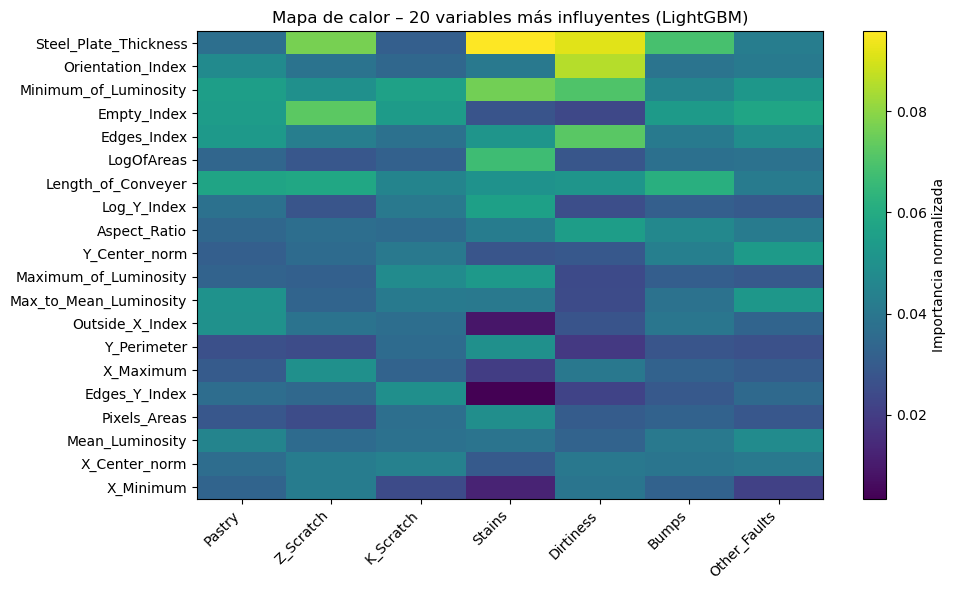

In [23]:
# --- 6) Heat-map de las 20 variables más influyentes en global --
top_feats = (
    imp_df.max(axis=1)              # importancia máxima que alcanza cada feature
          .sort_values(ascending=False)
          .head(20)
          .index
)

plt.figure(figsize=(10, 6))
plt.imshow(imp_df.loc[top_feats], aspect="auto")
plt.yticks(range(len(top_feats)), top_feats)
plt.xticks(range(len(class_names)), class_names, rotation=45, ha="right")
plt.colorbar(label="Importancia normalizada")
plt.title("Mapa de calor – 20 variables más influyentes (LightGBM)")
plt.tight_layout()
plt.show()